<a href="https://colab.research.google.com/github/okchang95/aiffel_quest/blob/main/ex1_2_1_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2-1. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자! < 11/20(월) >

데이터 : [회귀 (3) - 당뇨병 환자 데이터(diabetes)와 다중 선형 회귀](https://yhyun225.tistory.com/11)



### (1) 데이터 가져오기

sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.

diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [ ]:
# sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.

from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

diabetes=load_diabetes(as_frame=True)

In [ ]:
#diabetes.data            # => (442,10) 크기의 ndarray, 입력값
#diabetes.target          # => (442, ) 크기의 ndarray, 타깃
#diabetes.feature_names   # => data의 각 열의 특징 이름
#diabetes.frame           # => (442,11)크기의 데이터 프레임(호출할 때 인자로 받은 as_frame=True일 때만 접근 가능)
#diabetes.DESCR           # => 데이터셋의 설명
#diabetes.data_filename   # => data의 위치경로
#diabetes.target_filename # => target의 위치경로

'''
age: 나이
sex: 성별
bmi: Body mass index
bp: Average blood pressure
S1, S2, S3, S4, S5, S6 : 혈청에 대한 6가지 지표
'''

'\nage: 나이\nsex: 성별\nbmi: Body mass index\nbp: Average blood pressure\nS1, S2, S3, S4, S5, S6 : 혈청에 대한 6가지 지표\n'

In [ ]:
# diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

df_X = diabetes.data
df_y = diabetes.target

In [ ]:
type(df_X)

pandas.core.frame.DataFrame

### (2) 모델에 입력할 데이터 X 준비하기


In [ ]:
# df_X에 있는 값들을 numpy array로 변환해서 저장해주세요. -> 원래 numpyarray인데..

import numpy as np

np_X = np.array(df_X)
np_X


array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

### (3) 모델에 예측할 데이터 y 준비하기


In [ ]:
# df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

np_y = np.array(df_y)

### (4) train 데이터와 test 데이터로 분리하기

In [ ]:
# X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np_X, np_y, test_size=0.2, random_state=42)

In [ ]:
X_test.shape # (89, 10)
X_train.shape # (353, 10)
y_test.shape # (89,)
y_train.shape # (353,)

(353,)

### (5) 모델 준비하기

In [ ]:
# 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.

# 입력 데이터 개수 : 442
# feature 개수 : 10
df_X


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [ ]:
#W = np.random.rand(442)
W = np.random.rand(10)
b = np.random.rand()

In [ ]:
W   # (10,)
b   # float

0.8805356102175455

In [ ]:
# 모델 함수를 구현해주세요.

def model(X, W, b):
    pred = 0
    for i in range(10):
        pred += X[:, i] * W[i]  # 여기가문제였다(11/20, 19:33)
    pred += b
    return pred

### (6) 손실함수 loss 정의하기

In [ ]:
# 손실함수를 MSE 함수로 정의해주세요.

def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L


### (7) 기울기를 구하는 gradient 함수 구현하기

In [ ]:
# 기울기를 계산하는 gradient 함수를 구현해주세요.

def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)

    # y_pred 준비
    y_pred = model(X, W, b)

    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)

    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

### (8) 하이퍼 파라미터인 학습률 설정하기


In [ ]:
# 학습률, learning rate 를 설정해주세요

lr = 0.05

# 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

### (9) 모델 학습하기


In [ ]:
# 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
# loss값 기록
losses = []

for i in range(1, 10001):
    # gradient 결정
    dW, db = gradient(X_train, W, b, y_train)
    # parameter update
    W -= lr * dW
    b -= lr * db
    # updated parameter가 적용된 loss
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    # iter, loss 출력
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 4005.6041
Iteration 2000 : Loss 3442.6224
Iteration 3000 : Loss 3214.2465
Iteration 4000 : Loss 3093.7601
Iteration 5000 : Loss 3022.6713
Iteration 6000 : Loss 2978.8755
Iteration 7000 : Loss 2951.3047
Iteration 8000 : Loss 2933.6687
Iteration 9000 : Loss 2922.2175
Iteration 10000 : Loss 2914.6678


In [ ]:
# loss값이 충분히 떨어질 때까지 학습을 진행해주세요. (v)
'''
(1) lr = 0.0001 -> 0.05
        loss
        Iteration 1000 : Loss 21738.9576 -> 4005.6522

(2) iter = 1000 -> 10000
        loss
        Iteration 10000 : Loss 4005.6522 -> 2914.6993
'''
print('')

In [ ]:
# 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.
# -> bp빼보기

### (10) test 데이터에 대한 성능 확인하기


In [ ]:
# 위에서 업데이트한 파라미터를 모델에 적용, testdata를 모델에 넣고 돌리
prediction = model(X_test, W, b)
# test_pred에 대한 loss(mse)값 보기


In [ ]:
print(type(prediction))
print(type(y_test))

print(prediction.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(89,)
(89,)


In [ ]:
mse = loss(X_test, W, b, y_test)
mse

2866.8543236202436

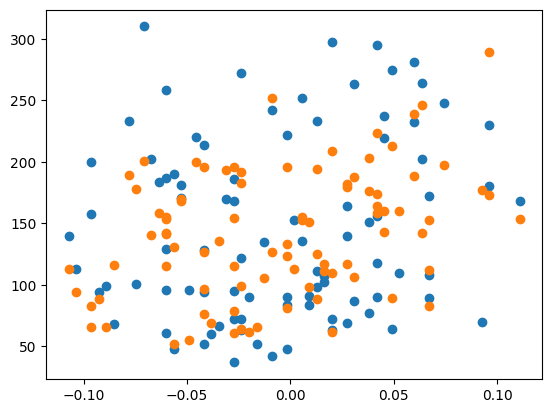

In [ ]:
# 결과 시각화
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()